
# For Text Mining assignment
TWO:

2) Extract reviews of any product from ecommerce website like amazon Perform emotion mining

In [177]:
headers = { 'authority': 'www.amazon.in',
            'accept-language': 'en-US,en;q=0.9',
            'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [178]:
import requests

In [179]:
from bs4 import BeautifulSoup as bs

In [180]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = bs(r.text, 'html.parser')
    return soup

In [181]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {  'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                        'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                        'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                        'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [182]:
from tqdm import tqdm_notebook
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/Redgear-Cloak-Gaming-Headphones-Microphone/product-reviews/B07T9FV9YP/ref=cm_cr_getr_d_paging_btm_next_22?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-182-3cf4edbafe56>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(160)):


  0%|          | 0/160 [00:00<?, ?it/s]

In [183]:
rg = pd.DataFrame(reviewlist)

rg

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBought it on 2nd June 2021...,5.0,"I had bought this product in 2021, I got it fo...",Reviewed in India on 2 February 2024
1,4.0 out of 5 stars\nRedgear Cloak Gaming Headp...,4.0,I recently purchased the Redgear Cloak Wired R...,Reviewed in India on 22 July 2023
2,5.0 out of 5 stars\nGood product,5.0,As this is huge it its easy to fit overhead to...,Reviewed in India on 10 September 2023
3,3.0 out of 5 stars\naverage headphone for the ...,3.0,The build of this headphone is good. But the v...,Reviewed in India on 27 January 2024
4,"4.0 out of 5 stars\nIm not a paid reviewer,or ...",4.0,I ordered it at 16.7.23 and hands on at 19.7.2...,Reviewed in India on 19 July 2023
...,...,...,...,...
105,4.0 out of 5 stars\nGood Product for the Price,4.0,I have been using this headphones for almost 6...,Reviewed in India on 6 October 2021
106,4.0 out of 5 stars\nBudget headphone,4.0,Good quality,Reviewed in India on 23 August 2023
107,4.0 out of 5 stars\nBetter gaming,4.0,Best for gaming surrounding sound is good 👍But,Reviewed in India on 25 July 2023
108,4.0 out of 5 stars\nAt this price it's not bad,4.0,Love it it's my first time using mic on headse...,Reviewed in India on 10 February 2023


In [184]:
rg["Review_Date"] = rg["Review_Date"].replace('Reviewed in India on','', regex=True)
rg['Review_Date'] = pd.to_datetime(rg['Review_Date'])

rg

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBought it on 2nd June 2021...,5.0,"I had bought this product in 2021, I got it fo...",2024-02-02
1,4.0 out of 5 stars\nRedgear Cloak Gaming Headp...,4.0,I recently purchased the Redgear Cloak Wired R...,2023-07-22
2,5.0 out of 5 stars\nGood product,5.0,As this is huge it its easy to fit overhead to...,2023-09-10
3,3.0 out of 5 stars\naverage headphone for the ...,3.0,The build of this headphone is good. But the v...,2024-01-27
4,"4.0 out of 5 stars\nIm not a paid reviewer,or ...",4.0,I ordered it at 16.7.23 and hands on at 19.7.2...,2023-07-19
...,...,...,...,...
105,4.0 out of 5 stars\nGood Product for the Price,4.0,I have been using this headphones for almost 6...,2021-10-06
106,4.0 out of 5 stars\nBudget headphone,4.0,Good quality,2023-08-23
107,4.0 out of 5 stars\nBetter gaming,4.0,Best for gaming surrounding sound is good 👍But,2023-07-25
108,4.0 out of 5 stars\nAt this price it's not bad,4.0,Love it it's my first time using mic on headse...,2023-02-10


In [185]:
Stop_Words = pd.read_csv("/content/stop.txt",error_bad_lines=False)
Stop_Words

<ipython-input-185-06fdb4e12af9>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Stop_Words = pd.read_csv("/content/stop.txt",error_bad_lines=False)


,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [186]:
import chardet
with open("/content/negative-words.txt", "r", encoding = 'latin1') as file:
    Neg_Words = [word.strip() for word in file]

print(Neg_Words)

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;', ';', '; Opinion Lexicon: Negative', ';', '; This file contains a list of NEGATIVE opinion words (or sentiment words).', ';', '; This file and the papers can all be downloaded from', ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', '; If you use this list, please cite one of the following two papers:', ';', ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."', ';       Proceedings of the ACM SIGKDD International Conference on Knowledge', ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle,', ';       Washington, USA,', ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing', ';       and Comparing Opinions on the Web." Proceedings of the 14th', ';       International World Wide Web conference (WWW-2005), May 10-14,', ';       2005, Chiba, Japan.', ';', '; Notes:', ';    1. The appearance of an opinion word in a sentence does 

In [187]:
with open("/content/positive-words.txt", "r") as file:
    Pos_Words = [word.strip() for word in file]

print(Pos_Words)

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;', ';', '; Opinion Lexicon: Positive', ';', '; This file contains a list of POSITIVE opinion words (or sentiment words).', ';', '; This file and the papers can all be downloaded from', ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', '; If you use this list, please cite one of the following two papers:', ';', ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."', ';       Proceedings of the ACM SIGKDD International Conference on Knowledge', ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle,', ';       Washington, USA,', ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing', ';       and Comparing Opinions on the Web." Proceedings of the 14th', ';       International World Wide Web conference (WWW-2005), May 10-14,', ';       2005, Chiba, Japan.', ';', '; Notes:', ';    1. The appearance of an opinion word in a sentence does no

In [188]:
one_tweet = df.iloc[4]['Review']
one_tweet

'I ordered it at 16.7.23 and hands on at 19.7.23 actually my purpose wasnt totally for gaming but since i got this headphone at Rs.399+150 for 2yr extended warranty, it was a bang for the bucks,its volume is okay and it satisfies the need of a gaming headset the comfort is of next level i used boatrockers for media consumption it will irritate and cause pain after 30min but this was comfortable but it doesnt apply to me cause i wear specs so i feel a slight pressure but i could wear it for 2hrs without any issues it may extent without specs. And the bass was not that great its an good thing when gaming is concerned so that u dont want to rip of ur ear when firing like things, and i dont know if its the problem of headphone or my pc the audiobalance was not proper i had to allign it in settings and the it worked fine ,the cable is not braided and it was more soft like u can bite with your teeth and rip them.it was the review after using it for 1day yeah the review was too quick but i wi

In [189]:
book = df.iloc[:,2:3]
book

,Review
0,"I had bought this product in 2021, I got it fo..."
1,I recently purchased the Redgear Cloak Wired R...
2,As this is huge it its easy to fit overhead to...
3,The build of this headphone is good. But the v...
4,I ordered it at 16.7.23 and hands on at 19.7.2...
...,...
105,I have been using this headphones for almost 6...
106,Good quality
107,Best for gaming surrounding sound is good 👍But
108,Love it it's my first time using mic on headse...


In [190]:
stop_words_set = set(Stop_Words['a'])

In [191]:
def get_emotion(review):
    review_words = set()  # Create an empty set for each review
    words = review.split()  # Split the review into words

    # Remove stop words from the words list
    words = [word for word in words if word.lower() not in stop_words_set]

    review_words.update(words)  # Add the words to the set

    positive_matches = set(review_words).intersection(Pos_Words)
    negative_matches = set(review_words).intersection(Neg_Words)

    positive_count = len(positive_matches)
    negative_count = len(negative_matches)

    # Determine the emotion label
    if positive_count > negative_count:
        emotion_label = "Positive"
    elif negative_count > positive_count:
        emotion_label = "Negative"
    else:
        emotion_label = "Neutral"

    # Calculate the emotion level
    emotion_level = positive_count - negative_count

    return emotion_label, emotion_level

In [192]:
# Apply the function to create new 'emotion_label' and 'emotion_level' columns
book[['emotion_label', 'emotion_level']] = book['Review'].apply(get_emotion).apply(pd.Series)

In [195]:
book

,Review,emotion_label,emotion_level
0,"I had bought this product in 2021, I got it fo...",Positive,3
1,I recently purchased the Redgear Cloak Wired R...,Positive,18
2,As this is huge it its easy to fit overhead to...,Positive,2
3,The build of this headphone is good. But the v...,Neutral,0
4,I ordered it at 16.7.23 and hands on at 19.7.2...,Positive,1
...,...,...,...
105,I have been using this headphones for almost 6...,Positive,4
106,Good quality,Neutral,0
107,Best for gaming surrounding sound is good 👍But,Positive,1
108,Love it it's my first time using mic on headse...,Positive,1


In [196]:
positive_count = book['emotion_label'].value_counts().get('Positive', 0)
negative_count = book['emotion_label'].value_counts().get('Negative', 0)
Neutral_count = book['emotion_label'].value_counts().get('Neutral', 0)

print("Positive Emotion Count:", positive_count)
print("Negative Emotion Count:", negative_count)
print("Neutral Emotion Count:", Neutral_count)

Positive Emotion Count: 70
Negative Emotion Count: 7
Neutral Emotion Count: 33


In [197]:
book.pivot_table(index=['emotion_label'],aggfunc={"emotion_label":'count'})

,emotion_label
emotion_label,
Negative,7
Neutral,33
Positive,70


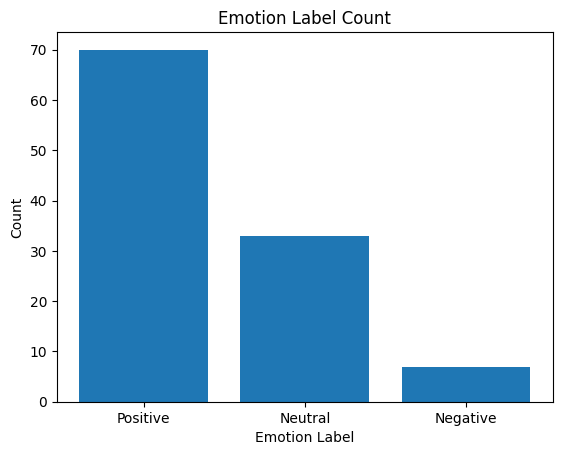

In [198]:
# Plot the bar graph
import matplotlib.pyplot as plt
emotion_counts = book['emotion_label'].value_counts()
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.title('Emotion Label Count')
plt.show()

In [199]:
df = book.iloc[:,0:1]
df

,Review
0,"I had bought this product in 2021, I got it fo..."
1,I recently purchased the Redgear Cloak Wired R...
2,As this is huge it its easy to fit overhead to...
3,The build of this headphone is good. But the v...
4,I ordered it at 16.7.23 and hands on at 19.7.2...
...,...
105,I have been using this headphones for almost 6...
106,Good quality
107,Best for gaming surrounding sound is good 👍But
108,Love it it's my first time using mic on headse...


In [200]:
df1 = [x.strip() for x in df.Review] # remove both the leading and the trailing characters
df1 = [x for x in df1 if x] # removes empty strings, because they are considered in Python as False
df1[0:10]

['I had bought this product in 2021, I got it for Rs899. I have been using it nearly 12-14 hours a day everyday for the past 2 and half years while also using several other headphones, so I think no-one else would be as better at rating this product as me.Pros -1. Good built and decent at comfort.2. Best BASS in this price segment (tested (Brutal Bass Test by Top Bass Production on YT & Ultimate Headphone Test) multiple times throughout the years and its the same as it was when new).3. Sensitivity, Frequency response, Distortion and Phase is on point (it even defeated numerous other headphones of my friends in this price range(1-1.5k) ).4. Cable is long and it helps to route.5. Microphone sensitivity is good and loud.Cons:-1. The cable was not braided and it tangles up easily.2. The volume adjustment scroller on the side does not work on few occasions (might be just my product).3. Its a bit heavy and does feel uncomfortable on longer sessions, especially if you perspire/sweat frequentl

In [201]:
# Joining the list into one string/text
text = ' '.join(df1)
text

'I had bought this product in 2021, I got it for Rs899. I have been using it nearly 12-14 hours a day everyday for the past 2 and half years while also using several other headphones, so I think no-one else would be as better at rating this product as me.Pros -1. Good built and decent at comfort.2. Best BASS in this price segment (tested (Brutal Bass Test by Top Bass Production on YT & Ultimate Headphone Test) multiple times throughout the years and its the same as it was when new).3. Sensitivity, Frequency response, Distortion and Phase is on point (it even defeated numerous other headphones of my friends in this price range(1-1.5k) ).4. Cable is long and it helps to route.5. Microphone sensitivity is good and loud.Cons:-1. The cable was not braided and it tangles up easily.2. The volume adjustment scroller on the side does not work on few occasions (might be just my product).3. Its a bit heavy and does feel uncomfortable on longer sessions, especially if you perspire/sweat frequently

In [202]:
#Punctuation
import string
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'I had bought this product in 2021 I got it for Rs899 I have been using it nearly 1214 hours a day everyday for the past 2 and half years while also using several other headphones so I think noone else would be as better at rating this product as mePros 1 Good built and decent at comfort2 Best BASS in this price segment tested Brutal Bass Test by Top Bass Production on YT  Ultimate Headphone Test multiple times throughout the years and its the same as it was when new3 Sensitivity Frequency response Distortion and Phase is on point it even defeated numerous other headphones of my friends in this price range115k 4 Cable is long and it helps to route5 Microphone sensitivity is good and loudCons1 The cable was not braided and it tangles up easily2 The volume adjustment scroller on the side does not work on few occasions might be just my product3 Its a bit heavy and does feel uncomfortable on longer sessions especially if you perspiresweat frequently Is good for smaller sessions of like 12 

In [203]:
#Tokenization
import nltk.data
from nltk.tokenize import word_tokenize
nltk.download('punkt')
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[:100])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['I', 'had', 'bought', 'this', 'product', 'in', '2021', 'I', 'got', 'it', 'for', 'Rs899', 'I', 'have', 'been', 'using', 'it', 'nearly', '1214', 'hours', 'a', 'day', 'everyday', 'for', 'the', 'past', '2', 'and', 'half', 'years', 'while', 'also', 'using', 'several', 'other', 'headphones', 'so', 'I', 'think', 'noone', 'else', 'would', 'be', 'as', 'better', 'at', 'rating', 'this', 'product', 'as', 'mePros', '1', 'Good', 'built', 'and', 'decent', 'at', 'comfort2', 'Best', 'BASS', 'in', 'this', 'price', 'segment', 'tested', 'Brutal', 'Bass', 'Test', 'by', 'Top', 'Bass', 'Production', 'on', 'YT', 'Ultimate', 'Headphone', 'Test', 'multiple', 'times', 'throughout', 'the', 'years', 'and', 'its', 'the', 'same', 'as', 'it', 'was', 'when', 'new3', 'Sensitivity', 'Frequency', 'response', 'Distortion', 'and', 'Phase', 'is', 'on', 'point']


In [204]:
#Noramalize the data
lower_words = [x.lower() for x in text_tokens]
print(lower_words[0:25])

['i', 'had', 'bought', 'this', 'product', 'in', '2021', 'i', 'got', 'it', 'for', 'rs899', 'i', 'have', 'been', 'using', 'it', 'nearly', '1214', 'hours', 'a', 'day', 'everyday', 'for', 'the']


In [205]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])
len(stemmed_tokens)

['i', 'had', 'bought', 'thi', 'product', 'in', '2021', 'i', 'got', 'it', 'for', 'rs899', 'i', 'have', 'been', 'use', 'it', 'nearli', '1214', 'hour', 'a', 'day', 'everyday', 'for', 'the', 'past', '2', 'and', 'half', 'year', 'while', 'also', 'use', 'sever', 'other', 'headphon', 'so', 'i', 'think', 'noon']


7360

In [206]:
import spacy
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')
nlp

In [207]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(stemmed_tokens))
print(doc[0:40])

i had bought thi product in 2021 i got it for rs899 i have been use it nearli 1214 hour a day everyday for the past 2 and half year while also use sever other headphon so i think noon


In [208]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])
len(lemmas)

['I', 'have', 'buy', 'thi', 'product', 'in', '2021', 'I', 'get', 'it', 'for', 'rs899', 'I', 'have', 'be', 'use', 'it', 'nearli', '1214', 'hour', 'a', 'day', 'everyday', 'for', 'the']


7446

In [209]:
# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [210]:
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])

['900' '910' 'a15' 'abl' 'about' 'absolut' 'accept' 'accord' 'acctual'
 'accur' 'activities2' 'actual' 'ad' 'add' 'addit' 'adg' 'adjust' 'affect'
 'afford' 'afraid' 'after' 'aftercushion' 'again' 'ala' 'all' 'allign'
 'allow' 'almost' 'also' 'although' 'amaz' 'amazin' 'amazon' 'amazonso'
 'amplifi' 'amzon' 'an' 'and' 'ani' 'annoy' 'ant' 'anyon' 'anyway' 'apart'
 'appear' 'appli' 'appreci' 'around' 'as' 'assum']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [212]:
print(X.toarray().shape)

(7446, 1063)


In [213]:
# bigram and trigram

vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=(100))
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(book["Review"])

In [214]:
bow_matrix_ngram

<110x100 sparse matrix of type '<class 'numpy.int64'>'
	with 2239 stored elements in Compressed Sparse Row format>

In [215]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['10' 'after' 'also' 'an' 'and' 'and it' 'and the' 'any' 'are' 'as' 'at'
 'audio' 'bass' 'be' 'best' 'budget' 'built' 'but' 'buy' 'cable' 'can'
 'comfort' 'during' 'ear' 'ear cups' 'for' 'for gaming' 'for the' 'from'
 'gaming' 'good' 'got' 'has' 'have' 'headphone' 'headphone is'
 'headphones' 'if' 'if you' 'in' 'is' 'is good' 'is not' 'it' 'it for'
 'it has' 'it is' 'it was' 'its' 'just' 'like' 'long' 'me' 'mic' 'music'
 'my' 'nice' 'no' 'noise' 'not' 'of' 'on' 'one' 'only' 'or' 'other'
 'overall' 'price' 'product' 'quality' 'quality is' 'range' 'rgb'
 'sessions' 'so' 'sound' 'sound quality' 'that' 'the' 'the volume' 'there'
 'these' 'they' 'thing' 'this' 'this headphone' 'this is' 'this price'
 'to' 'too' 'use' 'using' 'very' 'volume' 'was' 'will' 'with' 'without'
 'would' 'you']
[[0 0 1 ... 0 2 3]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 2]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [3 0 0 ... 0 0 2]]


In [216]:
# TFidf vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['emotion_label' 'emotion_level' 'review']
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [217]:
# Generate wordcloud
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

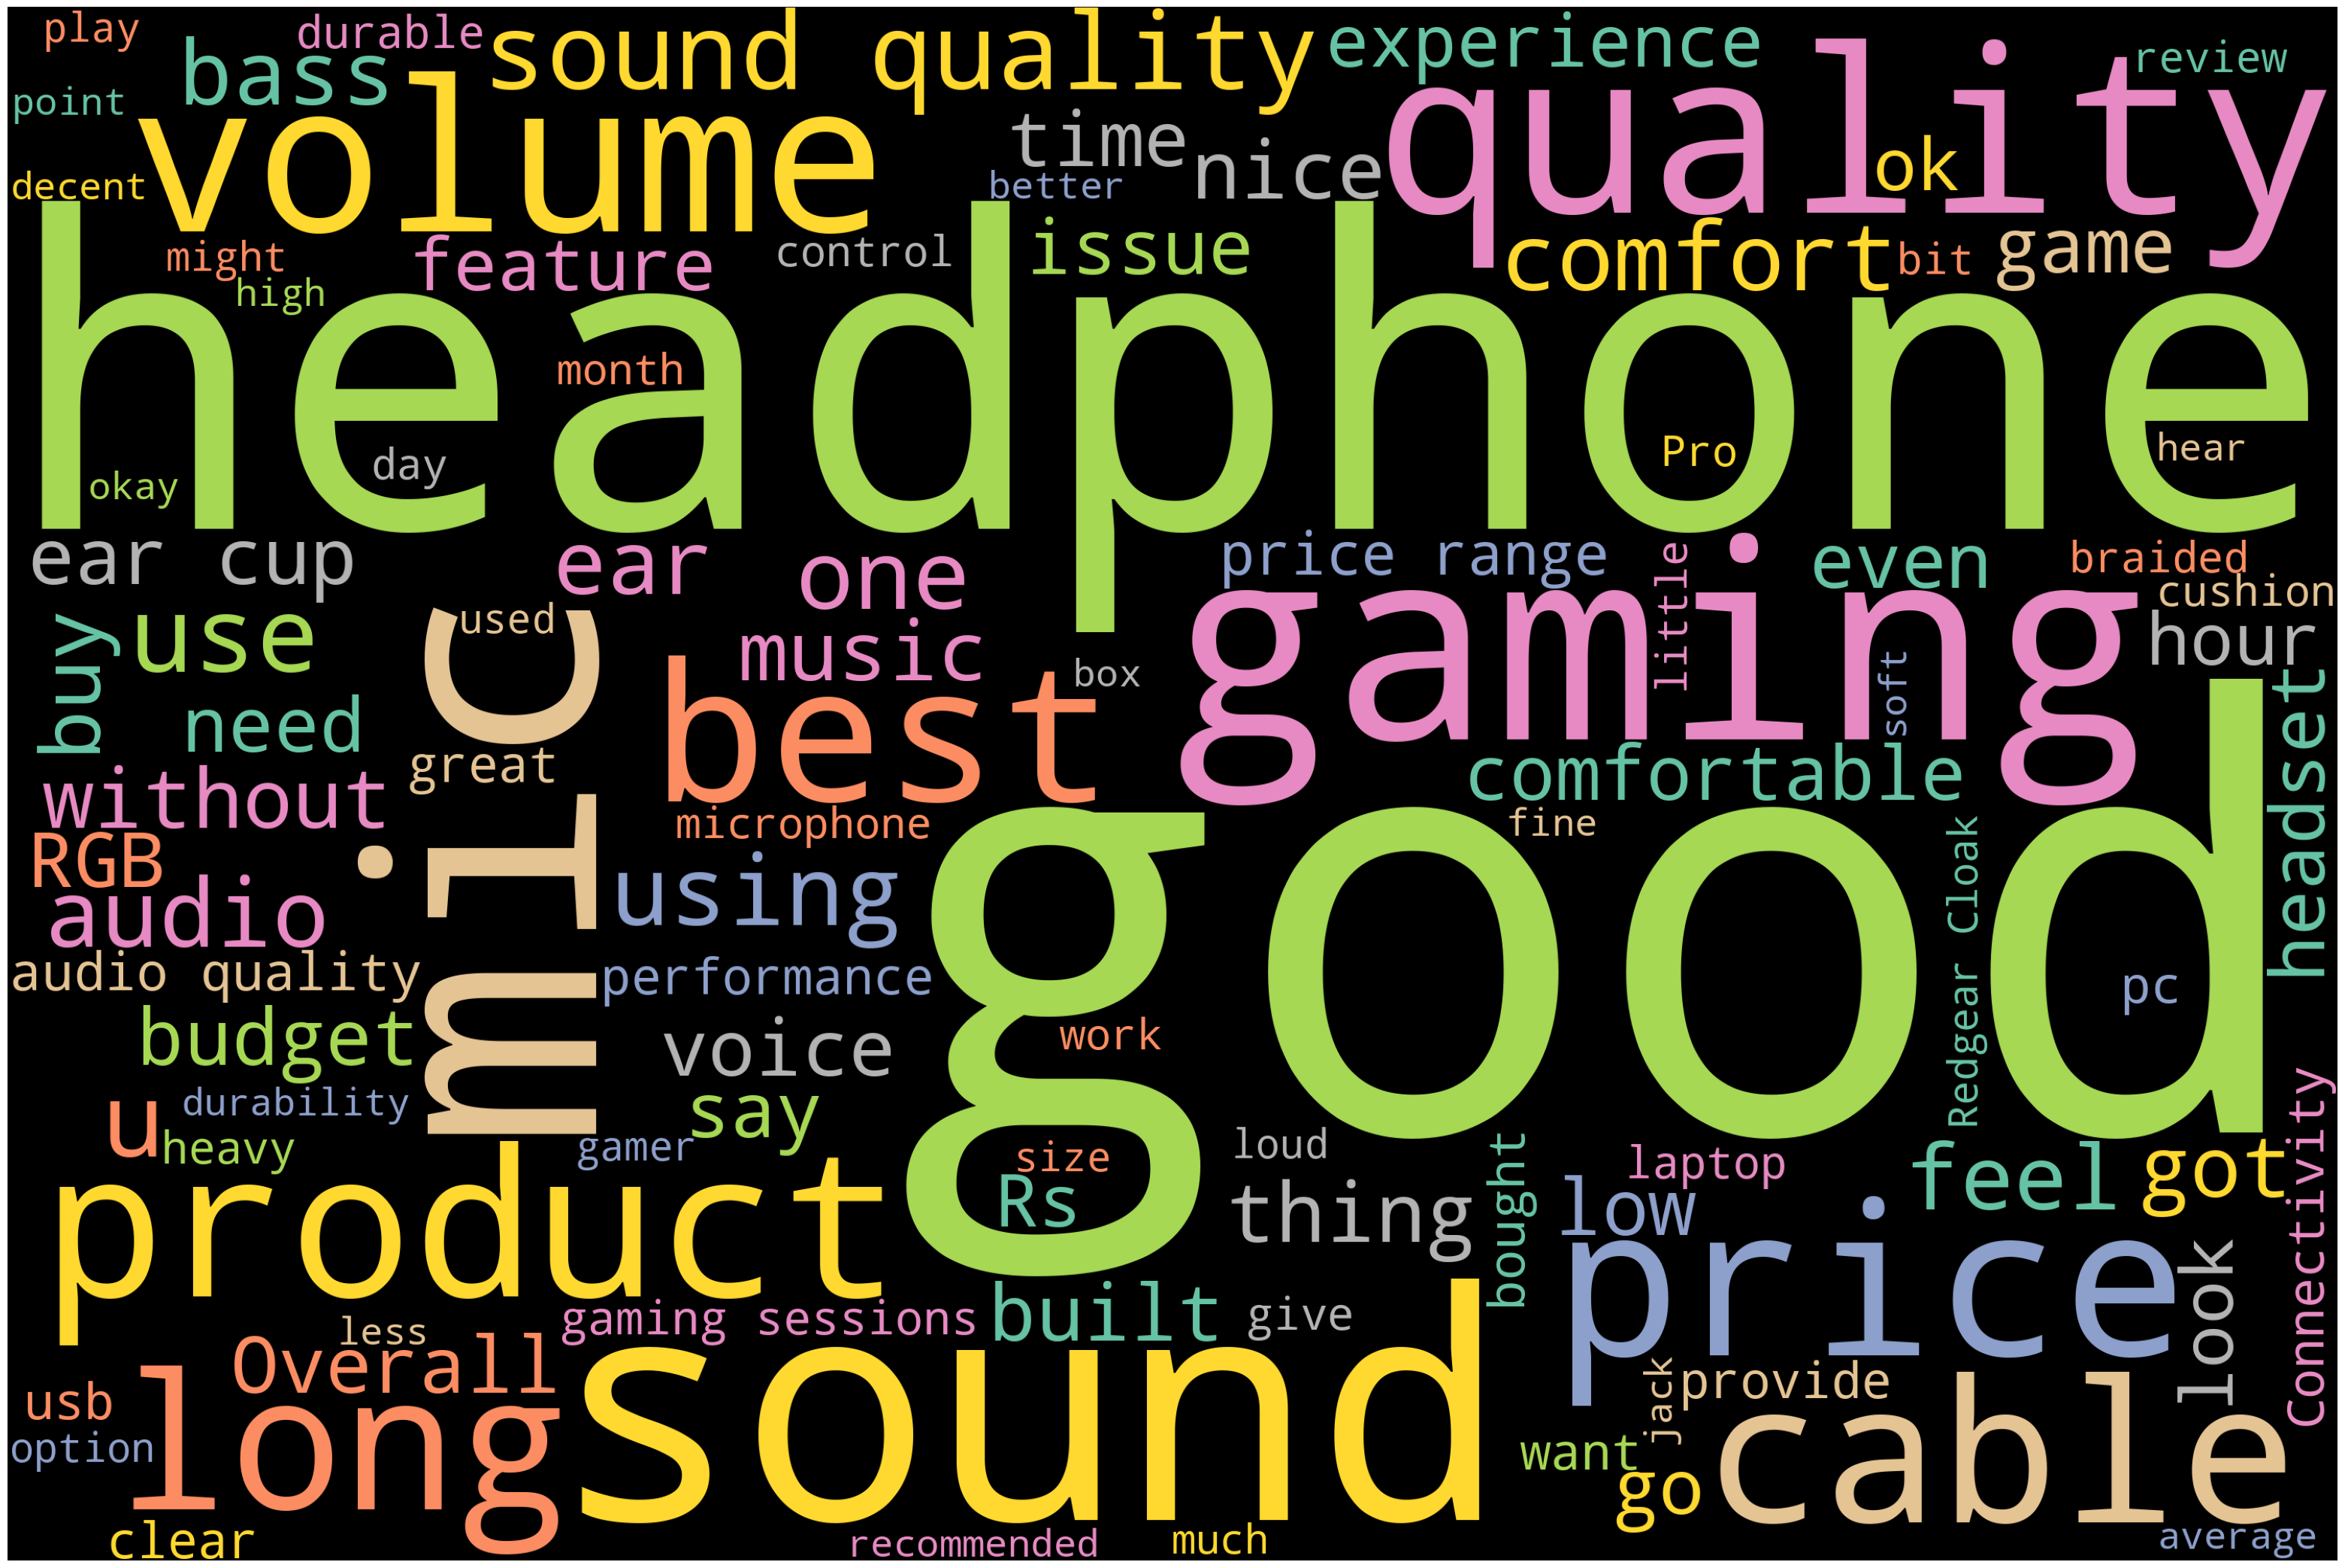

In [218]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [219]:
# Save image
wordcloud.to_file("wordcloud.png")